In [1]:
from PIL import Image
from itertools import product
import os
import random 
import numpy as np
import cv2
import matplotlib.pyplot as plt

In [2]:
def match_edge(index, tile, im1, im2):

    ### TOP EDGE
    if index == 0:
        if minEdges[tile,index] == 2:
            im2 = cv2.rotate(im2,cv2.ROTATE_90_COUNTERCLOCKWISE)
        if minEdges[tile,index]  == 3:
            im2 = cv2.rotate(im2,cv2.ROTATE_90_CLOCKWISE)
        if minEdges[tile,index]  == 0:
            im2 = cv2.rotate(im2,cv2.ROTATE_180)

        solved = cv2.vconcat([im2, im1])
    
    ### BOTTOM EDGE
    elif index == 1:
        if minEdges[tile,index] == 1:
            im2 = cv2.rotate(im2,cv2.ROTATE_180)
        if minEdges[tile,index]  == 2:
            im2 = cv2.rotate(im2,cv2.ROTATE_90_CLOCKWISE)
        if minEdges[tile,index]  == 3:
            im2 = cv2.rotate(im2,cv2.ROTATE_90_COUNTERCLOCKWISE)

        solved = cv2.vconcat([im1, im2])
    
    ### LEFT EDGE
    elif index == 2:
        if minEdges[tile,index] == 0:
            im2 = cv2.rotate(im2,cv2.ROTATE_90_CLOCKWISE)
        if minEdges[tile,index] == 1:
            im2 = cv2.rotate(im2,cv2.ROTATE_90_COUNTERCLOCKWISE)
        if minEdges[tile,index] == 2:
            im2 = cv2.rotate( im2,cv2.ROTATE_180)

        solved = cv2.hconcat([im2, im1])

    ### RIGHT EDGE
    elif index == 3:
        if minEdges[tile,index] == 0:
            im2 = cv2.rotate(im2,cv2.ROTATE_90_COUNTERCLOCKWISE)
        if minEdges[tile,index] == 1:
            im2 = cv2.rotate(im2,cv2.ROTATE_90_CLOCKWISE)
        if minEdges[tile,index] == 3:
            im2 = cv2.rotate( im2,cv2.ROTATE_180)

        solved = cv2.hconcat([im1, im2])

    return solved

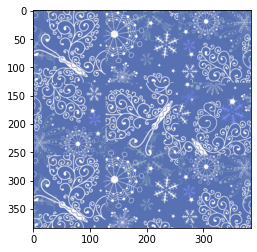

In [7]:

dir = "C:/Users/nicol/OneDrive/Documents/GitHub/Image-Analysis/iapr/data/data_project/tiles/solution_00_00"
tiles = []
tiles_noCanny = []
for image in os.listdir(dir):
        im = cv2.imread(os.path.join(dir, image))
        tiles.append(cv2.Canny(im,10,245))
        tiles_noCanny.append(cv2.cvtColor(im, cv2.COLOR_BGR2RGB))


edges = np.zeros((len(tiles), 4, 128))

for i in range(len(tiles)):
    image = tiles[i]
    imageArray = image
    edges[i,0,:] = imageArray[0,:]
    edges[i,1,:] = imageArray[127,:]
    edges[i,2,:] = imageArray[:,0]
    edges[i,3,:] = imageArray[:,127]

edges = edges/255

minL1s = np.zeros((len(tiles),4)) 
minTiles = np.zeros((len(tiles),4))
minEdges = np.zeros((len(tiles),4))


for i in range(len(tiles)):
    js = list(range(len(tiles)))
    js.remove(i)
    for a in range(4):
        minL1 = np.inf
        edge = edges[i,a,:]
        for j in js:
            for b in range(4):
                L1 = np.sum(np.abs(edges[j,b,:]-edge))
                if L1 < minL1:
                    minL1 = L1
                    minEdgeL1 = b
                    minTileL1 = j
        minL1s[i, a] = minL1
        minTiles[i, a] = minTileL1
        minEdges[i, a] = minEdgeL1

minTiles = minTiles.astype(int)
minEdges = minEdges.astype(int)

summed = np.sum(minL1s,axis=1)
center = np.argmin(summed)


# middle row
im1 = tiles_noCanny[center]
im2 = tiles_noCanny[minTiles[center,2]] #left
solved = match_edge(2, center, im1, im2)

im1 = solved
im2 = tiles_noCanny[minTiles[center,3]] #right
middle = match_edge(3, center, im1, im2)

# top row
tile_idx = minTiles[center,0]
im1 = tiles_noCanny[tile_idx]
im2 = tiles_noCanny[minTiles[tile_idx,2]] #left
solved = match_edge(2, tile_idx, im1, im2)

im1 = solved
im2 = tiles_noCanny[minTiles[tile_idx,3]] #right
top = match_edge(3, tile_idx, im1, im2)

# bottom row
tile_idx = minTiles[center,1]
im1 = tiles_noCanny[tile_idx]
im2 = tiles_noCanny[minTiles[tile_idx,2]] #left
solved = match_edge(2, tile_idx, im1, im2)

im1 = solved
im2 = tiles_noCanny[minTiles[tile_idx,3]] #right
bottom = match_edge(3, tile_idx, im1, im2)

full = cv2.vconcat([top, middle, bottom])
plt.imshow(full)


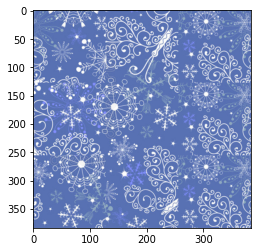

In [8]:
dir = "C:/Users/nicol/OneDrive/Documents/GitHub/Image-Analysis/iapr/data/data_project/tiles/solution_00_00"
tiles = []
tiles_noCanny = []
for image in os.listdir(dir):
        im = cv2.imread(os.path.join(dir, image))
        tiles.append(cv2.Canny(im,10,245))
        tiles_noCanny.append(cv2.cvtColor(im, cv2.COLOR_BGR2RGB))


edges = np.zeros((len(tiles), 4, 128, 3))

for i in range(len(tiles)):
    image = tiles_noCanny[i]
    imageArray = image
    edges[i,0,:,:] = imageArray[0,:,:]
    edges[i,1,:,:] = imageArray[127,:,:]
    edges[i,2,:,:] = imageArray[:,0,:]
    edges[i,3,:,:] = imageArray[:,127,:]

minDists = np.zeros((len(tiles),4)) 
minTiles = np.zeros((len(tiles),4))
minEdges = np.zeros((len(tiles),4))


for i in range(len(tiles)):
    js = list(range(len(tiles)))
    js.remove(i)
    for a in range(4):
        minDist = np.inf
        edge = edges[i,a,:,:]
        for j in js:
            for b in range(4):
                dist = np.average((np.abs(edge[:,0]-edges[j,b,:,0]),np.abs(edge[:,1]-edges[j,b,:,1]),np.abs(edge[:,1]-edges[j,b,:,2])))
                if dist < minDist:
                    minDist = dist
                    minEdgeL1 = b
                    minTileL1 = j
        minDists[i, a] = minDist
        minTiles[i, a] = minTileL1
        minEdges[i, a] = minEdgeL1

minTiles = minTiles.astype(int)
minEdges = minEdges.astype(int)

summed = np.sum(minDists,axis=1)
center = np.argmin(summed)


# middle row
im1 = tiles_noCanny[center]
im2 = tiles_noCanny[minTiles[center,2]] #left
solved = match_edge(2, center, im1, im2)

im1 = solved
im2 = tiles_noCanny[minTiles[center,3]] #right
middle = match_edge(3, center, im1, im2)

# top row
tile_idx = minTiles[center,0]
im1 = tiles_noCanny[tile_idx]
im2 = tiles_noCanny[minTiles[tile_idx,2]] #left
solved = match_edge(2, tile_idx, im1, im2)

im1 = solved
im2 = tiles_noCanny[minTiles[tile_idx,3]] #right
top = match_edge(3, tile_idx, im1, im2)

# bottom row
tile_idx = minTiles[center,1]
im1 = tiles_noCanny[tile_idx]
im2 = tiles_noCanny[minTiles[tile_idx,2]] #left
solved = match_edge(2, tile_idx, im1, im2)

im1 = solved
im2 = tiles_noCanny[minTiles[tile_idx,3]] #right
bottom = match_edge(3, tile_idx, im1, im2)

full = cv2.vconcat([top, middle, bottom])
plt.imshow(full)
